## Importing Data Set
Firstly, we need to import the dataset. The dataset can be downloaded from [here.](https://archive.org/download/ages-and-heights/AgesAndHeights.pkl)

In [4]:
# Visualise the Data
import pandas as pd
import matplotlib.pyplot as plt
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


We can see the data which we have and it contains only 2 columns namely, Age (in years) and Height (in inches) and 100 rows which is actually the representation of a person.

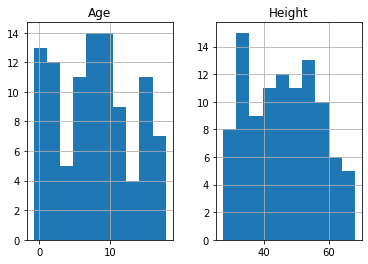

In [5]:
raw_data.hist()
plt.show()

This single line of code has a great impact on the way we look at the dataset. We only had a numerical view of the dataset but we can now run this cell to get a histogram view of the dataset which is very helpful. It represents the data present in the individual columns as individual graphs.

In [6]:
# Data Cleaning
#We have to build the model using valid datasets and clean the unaccountable Data. In the above image, we can know that there are a few entries that have an age less than zero which is meaningless. Hence, we need to clean those data to get better accuracy.
cleaned_data = raw_data[raw_data['Age']>0]
cleaned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


Initially, we had 100 rows but after performing Data Cleaning it’s pretty clear that there are seven rows which we had age < 0 and we have removed them. As a professional, we aren’t supposed to delete the data as we are reducing the data and thereby accuracy of our model gets reduced. To keep it simple I have just removed them.

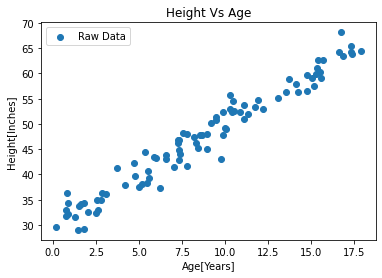

In [8]:
#Visualize the Cleaned Data: I have now used the cleaned data and visualized it in the form of a graph.
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.title('Height Vs Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()
plt.show()

In [9]:
# Build the model and train it
parameters = {'alpha':40,'beta':4}

def y_hat(age, params):
    alpha = params['alpha']
    beta = params['beta']
    return alpha + beta * age
y_hat(5, parameters)

60

I used a dictionary named parameters which has alpha and beta as key with 40 and 4 as values respectively. I have also defined a function y_hat which takes age, and params as parameters. This function uses the basic straight-line equation and returns y i.e. height as in our case. If we pass the required parameters and run the function, we find that the height we get for the age as input is not matched. Hence, we use the function mentioned below to rain the model.

In [10]:
def learn_parameter(data, params):
    x, y = data['Age'],data['Height']
    x_bar, y_bar = x.mean(), y.mean()
    x, y = x.to_numpy(), y.to_numpy()
    beta = sum(((x-x_bar)*(y-y_bar))/sum((x-x_bar)**2))
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta

In [13]:
new_parameter = {'alpha':0,'beta':0}
learn_parameter(cleaned_data, new_parameter)
new_parameter

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

This is where we use a method to find the correct alpha and beta. The function learn_parameters takes cleaned_data and a dummy dictionary new_parameter which can have any value for alpha and beta. So, when we pass them as arguments to parameters and function runs and we can get the correct value of alpha and beta which is found to close to 30 and 2 respectively and replace the old values with the new ones.

In [14]:
new_parameter = {'alpha':-2,'beta':1000}
learn_parameter(cleaned_data, new_parameter)
new_parameter

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

We have accurately found the values of alpha and beta, and our next goal is to train the data. But let me the untrained predicted values to what extent they are accurate.

In [15]:
spaced_ages = list(range(19))
spaced_untrained_predictions = [y_hat(x, parameters) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


I use a list named spaces_ages that has values from 0 to 18 (end – 1). Then another list named spaced_untrained_predictions that has the predicted values for the height uses the y_hat function defined earlier to predict it. These values are plotted in a graph and visualized.

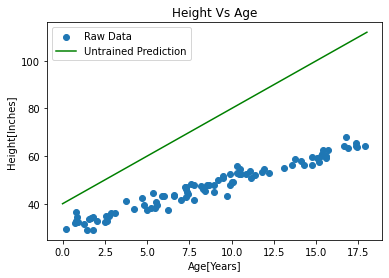

In [18]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages,spaced_untrained_predictions, label='Untrained Prediction',color='green')
plt.title('Height Vs Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()
plt.show()

The green line shows that the spaced_untrained_predictions have largely deviated from the actual values and the accuracy is very poor. Hence, accuracy needs to be increased for which we need to train the data.

[29.96185761461583, 31.96327451352646, 33.96469141243709, 35.966108311347725, 37.96752521025836, 39.96894210916899, 41.97035900807962, 43.97177590699025, 45.97319280590088, 47.97460970481151, 49.97602660372215, 51.97744350263278, 53.97886040154341, 55.98027730045404, 57.98169419936467, 59.9831110982753, 61.984527997185936, 63.98594489609657, 65.98736179500719]


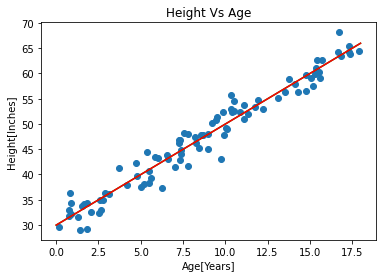

In [21]:
spaced_trained_predictions = [y_hat(x,new_parameter) for x in spaced_ages]
print(spaced_untrained_predictions)
plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages,spaced_untrained_predictions, label='Untrained Prediction',color='green')
plt.plot(spaced_ages,spaced_trained_predictions, label='Trained Prediction',color='red')
plt.title('Height Vs Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.show()

So instead of using parameters, we use new_parameters as it contains the accurate value of alpha and beta and stores it in a list named spaced_trained_predictions. So, when we plot a graph for this, we can see a visible difference and the accuracy has increased a lot. Therefore, we have successfully built and trained the model. Proof for that is the values of spaced_trained_predictions and the graph.

In [23]:
# Make Predictions on Unseen data
new_age = int(input('Enter age to predict height: '))
y_hat(new_age, new_parameter)

35.966108311347725

So, we can see for any given age we find the possible height in inches. Finally, we have successfully trained the model and with utmost accuracy which is the ultimate goal of this tutorial.